In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('VKR_docs.csv')
df['dict_sections_texts'] = df['dict_sections_texts'].map(eval)
print('Количество текстов:', len(df))
df.head(2)

Количество текстов: 359


,title,text_paper,dict_sections_texts,faculty_department,faculty,department,degree,main_preproc_text
0,Анализ психологических типов сотрудников для м...,['Министерство науки и высшего образования Рос...,{'министерство науки и высшего образования рос...,"['ФБИТ', 'ПБКС']",ФБИТ,ПБКС,bachelor,федеральный государственный автономный образов...
1,Исследование влияния алгоритма стохастического...,['Министерство науки и высшего образования Рос...,{'министерство науки и высшего образования рос...,"['ФБИТ', 'ПБКС']",ФБИТ,ПБКС,bachelor,автор бахтияров алина шамильевич фамилия имя о...


In [3]:
def get_introduction(dict_sections_texts_clean):
    try:
        return dict_sections_texts_clean['введение']
    except:
        return 'NONE'
    
df['introduction'] = df['dict_sections_texts'].map(get_introduction)
df.head(2)

,title,text_paper,dict_sections_texts,faculty_department,faculty,department,degree,main_preproc_text,introduction
0,Анализ психологических типов сотрудников для м...,['Министерство науки и высшего образования Рос...,{'министерство науки и высшего образования рос...,"['ФБИТ', 'ПБКС']",ФБИТ,ПБКС,bachelor,федеральный государственный автономный образов...,В данной работе затрагивается проблема обеспеч...
1,Исследование влияния алгоритма стохастического...,['Министерство науки и высшего образования Рос...,{'министерство науки и высшего образования рос...,"['ФБИТ', 'ПБКС']",ФБИТ,ПБКС,bachelor,автор бахтияров алина шамильевич фамилия имя о...,Система обнаружения вторжений СОВ это система ...


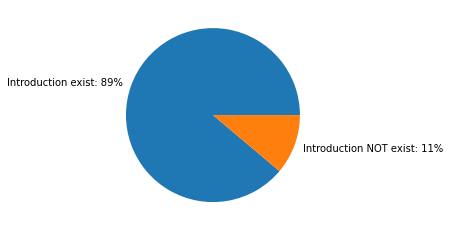

In [4]:
p1 = len(df[df['introduction'] != 'NONE'])
p2 = len(df[df['introduction'] == 'NONE'])

y = np.array([p1, p2])
mylabels = ["Introduction exist: "+str(round((p1/(p1+p2))*100))+'%', "Introduction NOT exist: "+str(round((p2/(p1+p2))*100))+'%']

plt.pie(y, labels = mylabels)
plt.show() 

In [5]:
def get_contents(dict_sections_texts_clean):
    if 'оглавление' in dict_sections_texts_clean:       
        return dict_sections_texts_clean['оглавление']
    elif 'содержание' in dict_sections_texts_clean:       
        return dict_sections_texts_clean['содержание']
    else:
        return 'NONE'
    
df['contents'] = df['dict_sections_texts'].map(get_contents)
df.head(2)

,title,text_paper,dict_sections_texts,faculty_department,faculty,department,degree,main_preproc_text,introduction,contents
0,Анализ психологических типов сотрудников для м...,['Министерство науки и высшего образования Рос...,{'министерство науки и высшего образования рос...,"['ФБИТ', 'ПБКС']",ФБИТ,ПБКС,bachelor,федеральный государственный автономный образов...,В данной работе затрагивается проблема обеспеч...,Глава Основы Социальной Инженерии Как Средства...
1,Исследование влияния алгоритма стохастического...,['Министерство науки и высшего образования Рос...,{'министерство науки и высшего образования рос...,"['ФБИТ', 'ПБКС']",ФБИТ,ПБКС,bachelor,автор бахтияров алина шамильевич фамилия имя о...,Система обнаружения вторжений СОВ это система ...,Задание на выпускную квалификационную работу А...


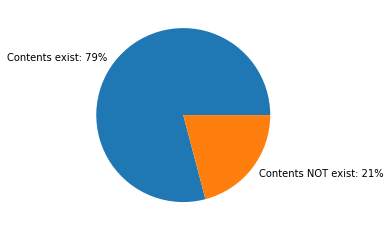

In [6]:
p1 = len(df[df['contents'] != 'NONE'])
p2 = len(df[df['contents'] == 'NONE'])

y = np.array([p1, p2])
mylabels = ["Contents exist: "+str(round((p1/(p1+p2))*100))+'%', "Contents NOT exist: "+str(round((p2/(p1+p2))*100))+'%']

plt.pie(y, labels = mylabels)
plt.show() 

In [7]:
def get_conclusion(dict_sections_texts_clean):
    if 'заключение' in dict_sections_texts_clean:       
        return dict_sections_texts_clean['заключение']
    elif 'выводы' in dict_sections_texts_clean:       
        return dict_sections_texts_clean['выводы']
    else:
        return 'NONE'
    
df['conclusion'] = df['dict_sections_texts'].map(get_conclusion)
df.head(2)

,title,text_paper,dict_sections_texts,faculty_department,faculty,department,degree,main_preproc_text,introduction,contents,conclusion
0,Анализ психологических типов сотрудников для м...,['Министерство науки и высшего образования Рос...,{'министерство науки и высшего образования рос...,"['ФБИТ', 'ПБКС']",ФБИТ,ПБКС,bachelor,федеральный государственный автономный образов...,В данной работе затрагивается проблема обеспеч...,Глава Основы Социальной Инженерии Как Средства...,В проведенном исследовании успешность принимае...
1,Исследование влияния алгоритма стохастического...,['Министерство науки и высшего образования Рос...,{'министерство науки и высшего образования рос...,"['ФБИТ', 'ПБКС']",ФБИТ,ПБКС,bachelor,автор бахтияров алина шамильевич фамилия имя о...,Система обнаружения вторжений СОВ это система ...,Задание на выпускную квалификационную работу А...,В ходе выполнения данной работы был произведен...


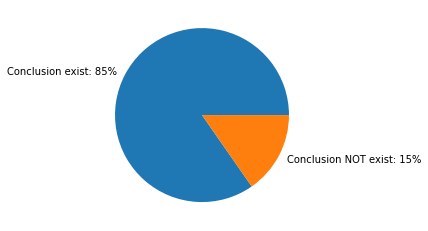

In [8]:
p1 = len(df[df['conclusion'] != 'NONE'])
p2 = len(df[df['conclusion'] == 'NONE'])

y = np.array([p1, p2])
mylabels = ["Conclusion exist: "+str(round((p1/(p1+p2))*100))+'%', "Conclusion NOT exist: "+str(round((p2/(p1+p2))*100))+'%']

plt.pie(y, labels = mylabels)
plt.show() 

In [9]:
def get_TZ(dict_sections_texts_clean):
    for section, texts in dict_sections_texts_clean.items():
        if 'техническое задание' in section:
            return texts
    return 'NONE'

df['TZ'] = df['dict_sections_texts'].map(get_TZ)
df.head(2)

,title,text_paper,dict_sections_texts,faculty_department,faculty,department,degree,main_preproc_text,introduction,contents,conclusion,TZ
0,Анализ психологических типов сотрудников для м...,['Министерство науки и высшего образования Рос...,{'министерство науки и высшего образования рос...,"['ФБИТ', 'ПБКС']",ФБИТ,ПБКС,bachelor,федеральный государственный автономный образов...,В данной работе затрагивается проблема обеспеч...,Глава Основы Социальной Инженерии Как Средства...,В проведенном исследовании успешность принимае...,NONE
1,Исследование влияния алгоритма стохастического...,['Министерство науки и высшего образования Рос...,{'министерство науки и высшего образования рос...,"['ФБИТ', 'ПБКС']",ФБИТ,ПБКС,bachelor,автор бахтияров алина шамильевич фамилия имя о...,Система обнаружения вторжений СОВ это система ...,Задание на выпускную квалификационную работу А...,В ходе выполнения данной работы был произведен...,NONE


In [10]:
df.to_csv('VKR_docs_structure.csv', index=False)